In [1]:
import os
import sys
import warnings

import pdb

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

from utils import MySet

from utils import local_data
from utils import window
from utils import Scale, give_error
from utils import generate_and_avaliate_model

from utils import location_station, find_set_sunrise, find_set_sunset

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise_update.pkl')

In [3]:
df.columns

Index(['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2',
       'gvtec2_dt', 'state_night', 'state_dawn', 'vm1', 'vd1', 'vm2', 'vd2',
       'gvtec1_dt_lag_9', 'gvtec2_dt_lag_20', 'vtec_dt_lag_3', 's4'],
      dtype='object')

In [4]:
original = MySet('original', ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt'])
tempo  = MySet('tempo', ['state_night', 'state_dawn'])
mdv1 = MySet('mdv1', ['vm1', 'vd1'])
mdv2 = MySet('mdv2', ['vm2', 'vd2'])
lag = MySet('lag', ['gvtec1_dt_lag_9', 'gvtec2_dt_lag_20'])

vtec = MySet('vtec', ['vtec'])
vtec_dt = MySet('vtec_dt', ['vtec_dt'])
vtec_dt2 = MySet('vtec_dt2', ['vtec_dt2'])
gvtec1 = MySet('gvtec1', ['gvtec1'])
gvtec1_dt = MySet('gvtec1_dt', ['gvtec1_dt'])
gvtec2 = MySet('gvtec2', ['gvtec2'])
gvtec2_dt = MySet('gvtec2_dt', ['gvtec2_dt'])
state_night = MySet('state_night', ['state_night'])
state_dawn = MySet('state_dawn', ['state_dawn'])
vm1 = MySet('vm1', ['vm1'])
vd1 = MySet('vd1', ['vd1'])
vm2 = MySet('vm2', ['vm2'])
vd2 = MySet('vd2', ['vd2'])
gvtec1_dt_lag_9 = MySet('gvtec1_dt_lag_9', ['gvtec1_dt_lag_9'])
gvtec2_dt_lag_20 = MySet('gvtec2_dt_lag_20', ['gvtec2_dt_lag_20'])

In [5]:
set_tests = [original,
             original-vtec,
             original-vtec_dt,
             original-gvtec1,
             original-gvtec1_dt,
             original-gvtec2,
             original-gvtec2_dt,
             original+tempo,
             original+gvtec1_dt_lag_9,
             original+gvtec2_dt_lag_20,
             original+lag,
             original+mdv1,
             original+mdv2,
             original+tempo+lag,
             original+tempo+mdv2,
             original+tempo+mdv2+lag,
             original+tempo+lag+mdv1+mdv2,
             vtec,
             vtec+gvtec1_dt_lag_9,
             vtec+gvtec2_dt_lag_20,
             vtec+vtec_dt+vtec_dt2,
             vtec+gvtec1+gvtec2,
             vtec+tempo,
             vtec+tempo+mdv1,
             vtec+tempo+lag,
             vtec+tempo+lag+mdv1,
             vtec+tempo+lag+mdv2,
             vtec+tempo+lag+mdv1+mdv2]

original
Error for the time series sample:
acc             0.861456
f1              0.536247
far             0.427199
fn             43.600000
fp             34.400000
kappa           0.065444
me              0.338105
mse             0.004235
pod             0.510112
precission      0.572801
re             24.152625
recall          0.510112
tn            439.600000
tp             45.400000
tse             1.543466
dtype: float64


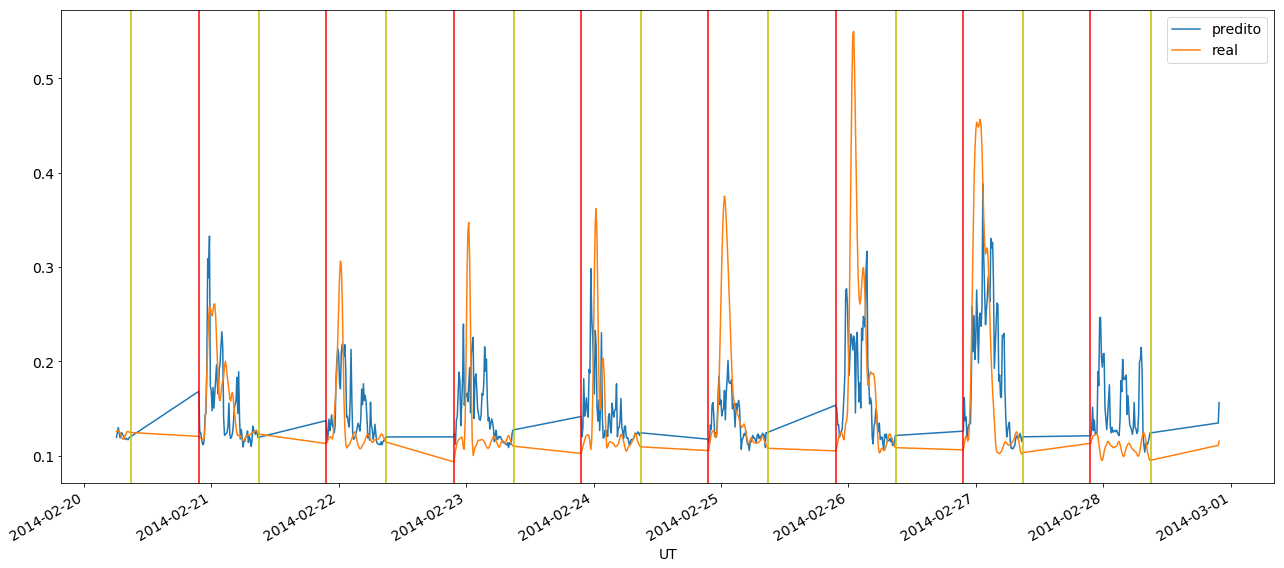


original - vtec
Error for the time series sample:
acc             0.832860
f1              0.528190
far             0.521606
fn             36.400000
fp             57.700000
kappa           0.057235
me              0.352056
mse             0.005010
pod             0.591011
precission      0.478394
re             30.847764
recall          0.591011
tn            416.300000
tp             52.600000
tse             1.677697
dtype: float64


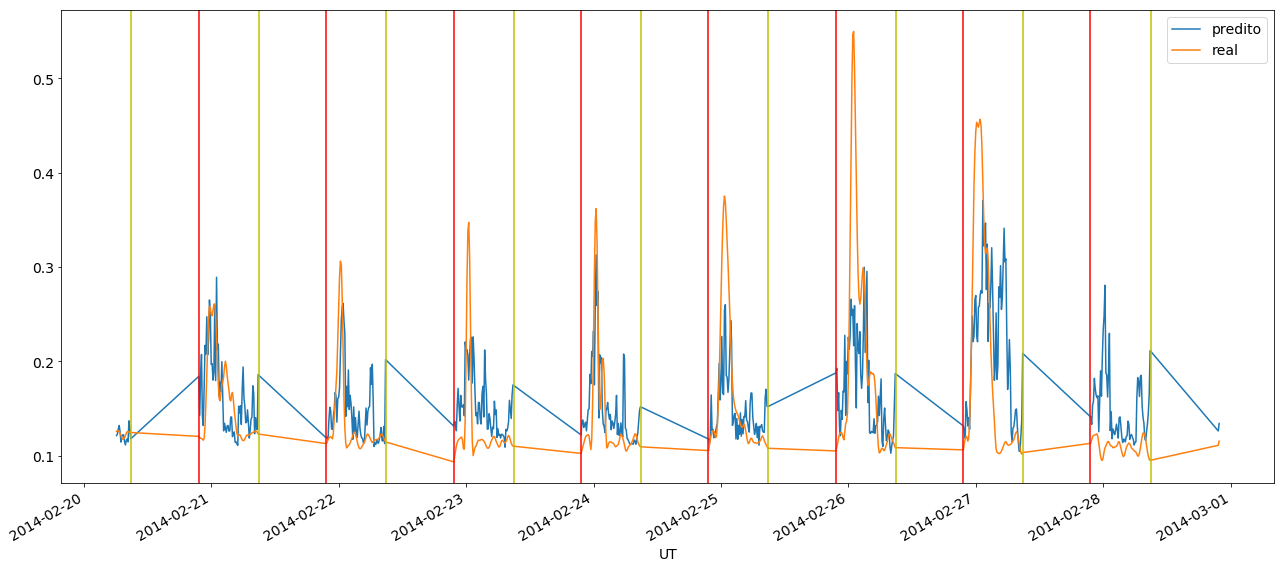


original - vtec_dt
Error for the time series sample:
acc             0.859325
f1              0.491245
far             0.426907
fn             50.600000
fp             28.600000
kappa           0.074620
me              0.345755
mse             0.004414
pod             0.431461
precission      0.573093
re             23.549305
recall          0.431461
tn            445.400000
tp             38.400000
tse             1.576160
dtype: float64


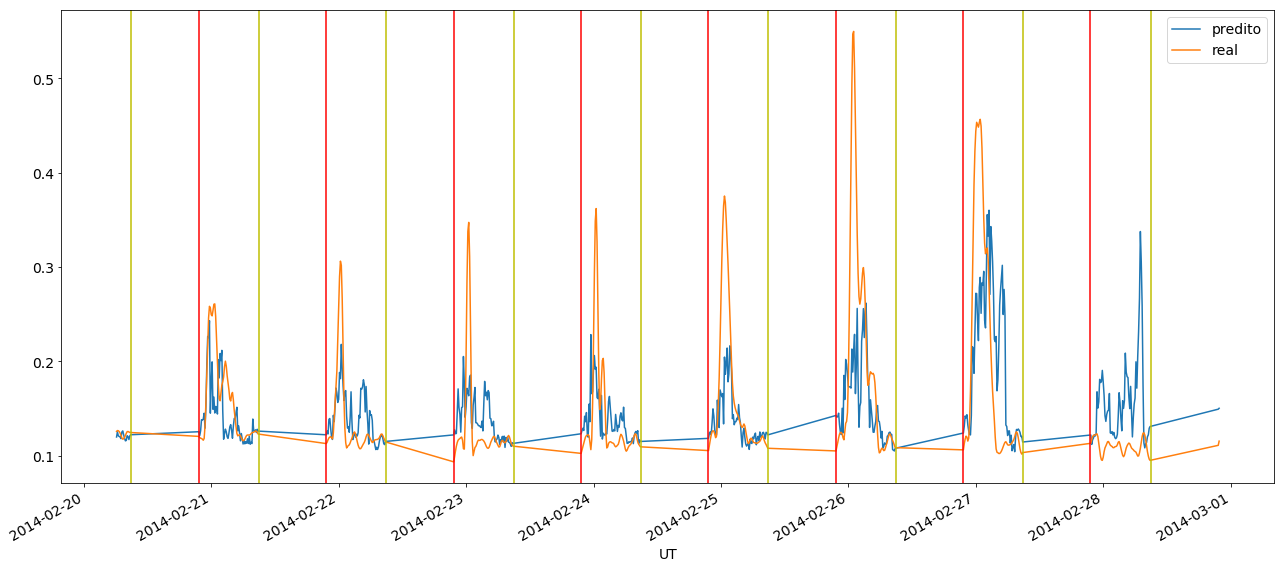


original - gvtec1
Error for the time series sample:
acc             0.866075
f1              0.534997
far             0.404273
fn             45.600000
fp             29.800000
kappa           0.068016
me              0.352582
mse             0.004417
pod             0.487640
precission      0.595727
re             24.981583
recall          0.487640
tn            444.200000
tp             43.400000
tse             1.576702
dtype: float64


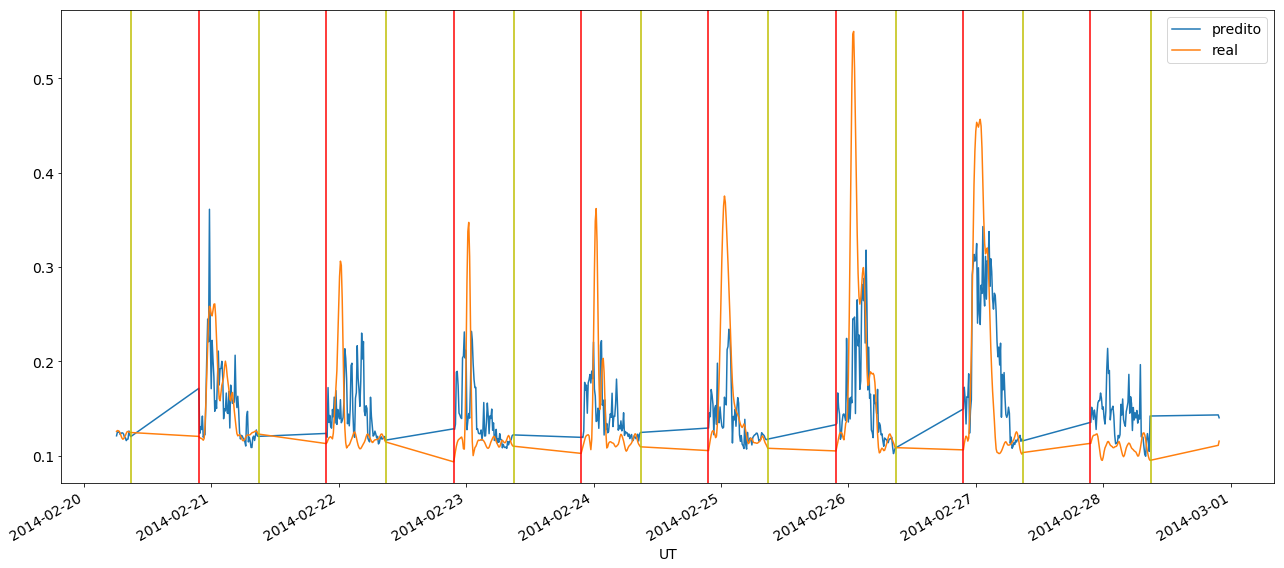


original - gvtec1_dt
Error for the time series sample:
acc             0.855773
f1              0.479822
far             0.439292
fn             51.500000
fp             29.700000
kappa           0.075747
me              0.367211
mse             0.004452
pod             0.421348
precission      0.560708
re             23.057307
recall          0.421348
tn            444.300000
tp             37.500000
tse             1.582751
dtype: float64


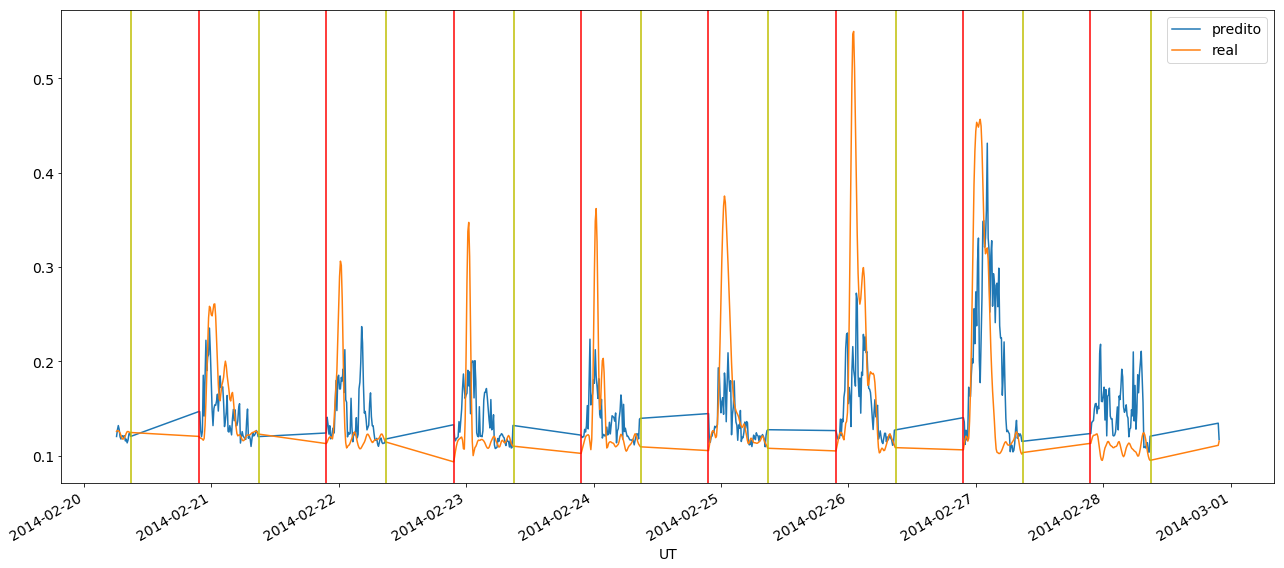


original - gvtec2
Error for the time series sample:
acc             0.817229
f1              0.494470
far             0.560833
fn             38.500000
fp             64.400000
kappa           0.060081
me              0.345874
mse             0.005257
pod             0.567416
precission      0.439167
re             31.106305
recall          0.567416
tn            409.600000
tp             50.500000
tse             1.719981
dtype: float64


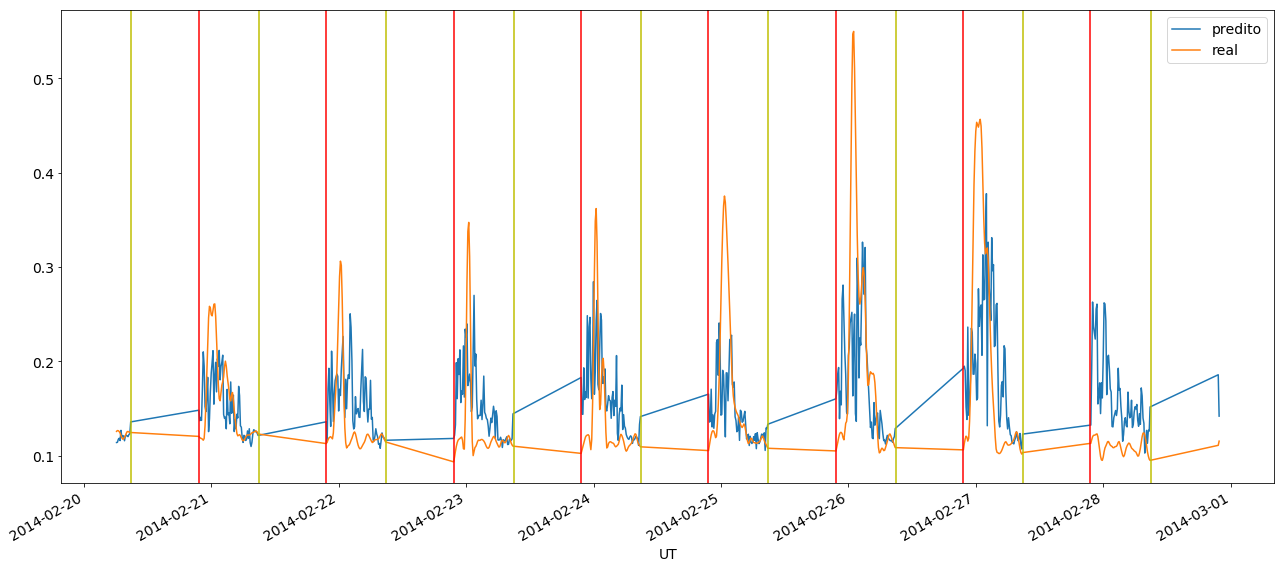


original - gvtec2_dt
Error for the time series sample:
acc             0.863055
f1              0.523162
far             0.413766
fn             46.800000
fp             30.300000
kappa           0.069540
me              0.371326
mse             0.004410
pod             0.474157
precission      0.586234
re             23.648657
recall          0.474157
tn            443.700000
tp             42.200000
tse             1.575034
dtype: float64


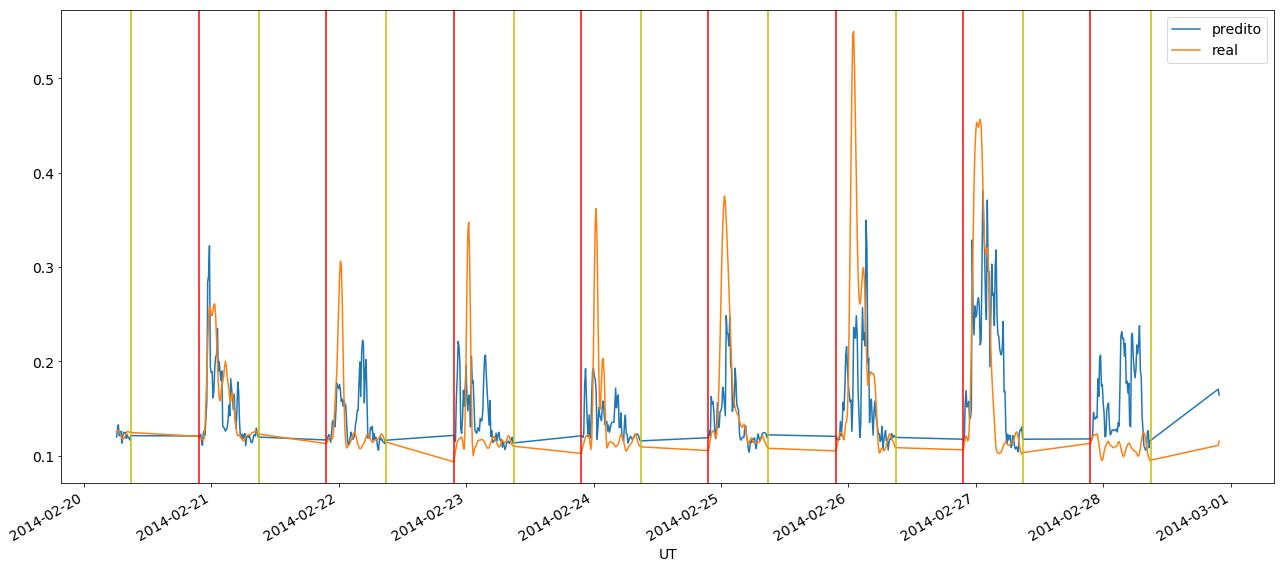


original + tempo
Error for the time series sample:
acc             0.871048
f1              0.570911
far             0.398820
fn             40.400000
fp             32.200000
kappa           0.061229
me              0.359477
mse             0.004210
pod             0.546067
precission      0.601180
re             23.957247
recall          0.546067
tn            441.800000
tp             48.600000
tse             1.538254
dtype: float64


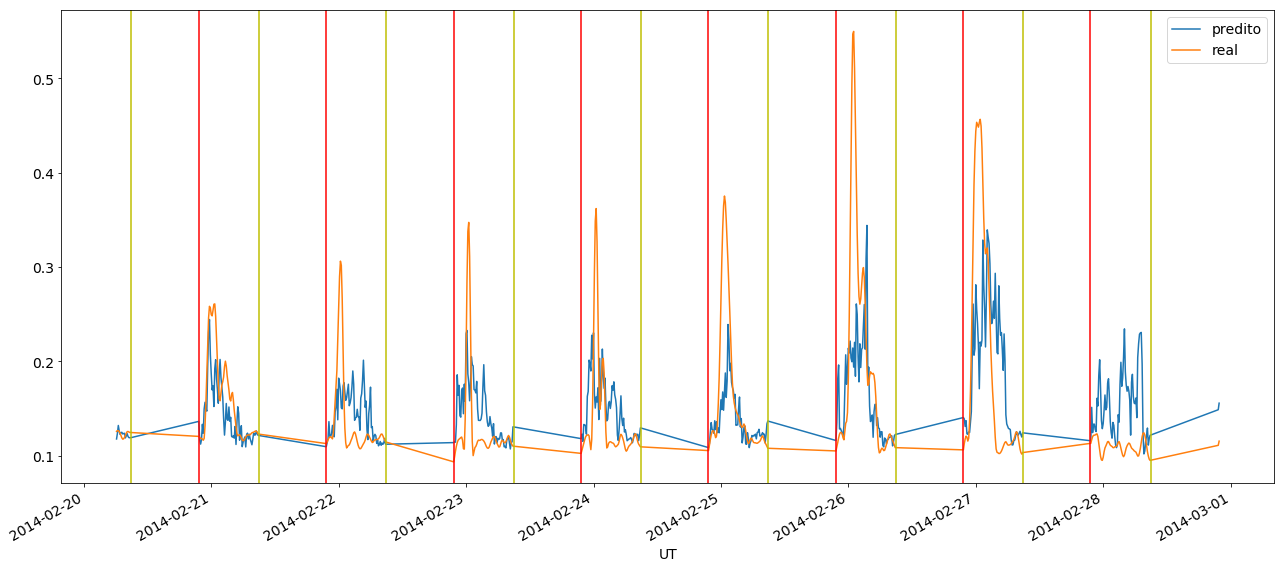


original + gvtec1_dt_lag_9
Error for the time series sample:
acc             0.874778
f1              0.599209
far             0.391181
fn             36.300000
fp             34.200000
kappa           0.056086
me              0.344069
mse             0.004115
pod             0.592135
precission      0.608819
re             24.128624
recall          0.592135
tn            439.800000
tp             52.700000
tse             1.521921
dtype: float64


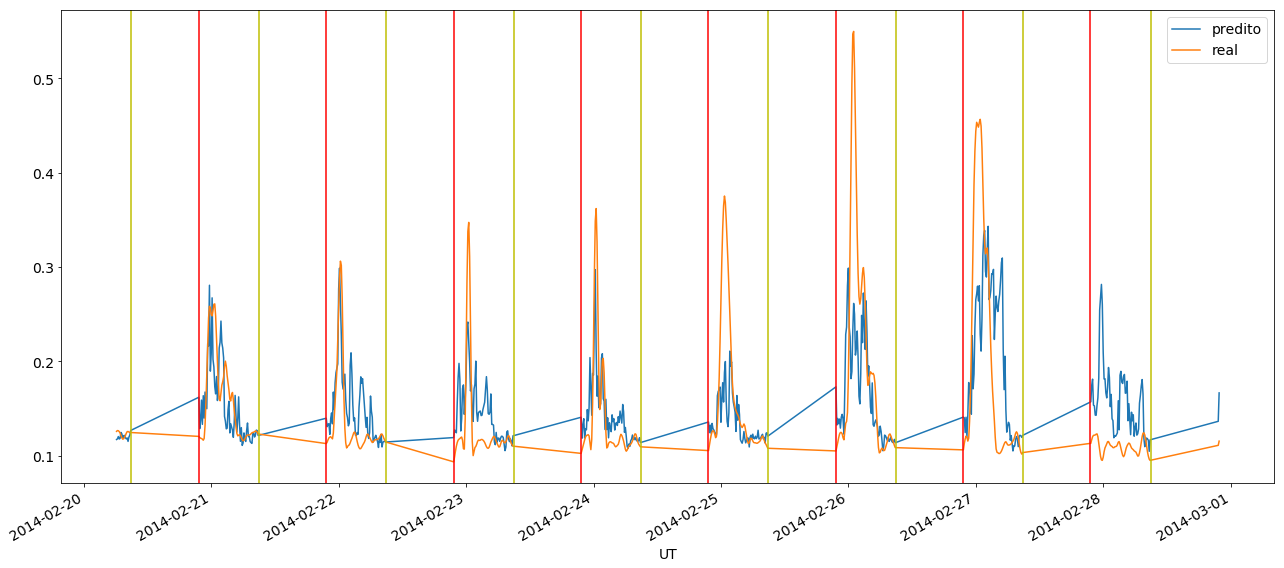


original + gvtec2_dt_lag_20
Error for the time series sample:
acc             0.858082
f1              0.540370
far             0.445141
fn             42.000000
fp             37.900000
kappa           0.063426
me              0.354893
mse             0.004193
pod             0.528090
precission      0.554859
re             24.301047
recall          0.528090
tn            436.100000
tp             47.000000
tse             1.536103
dtype: float64


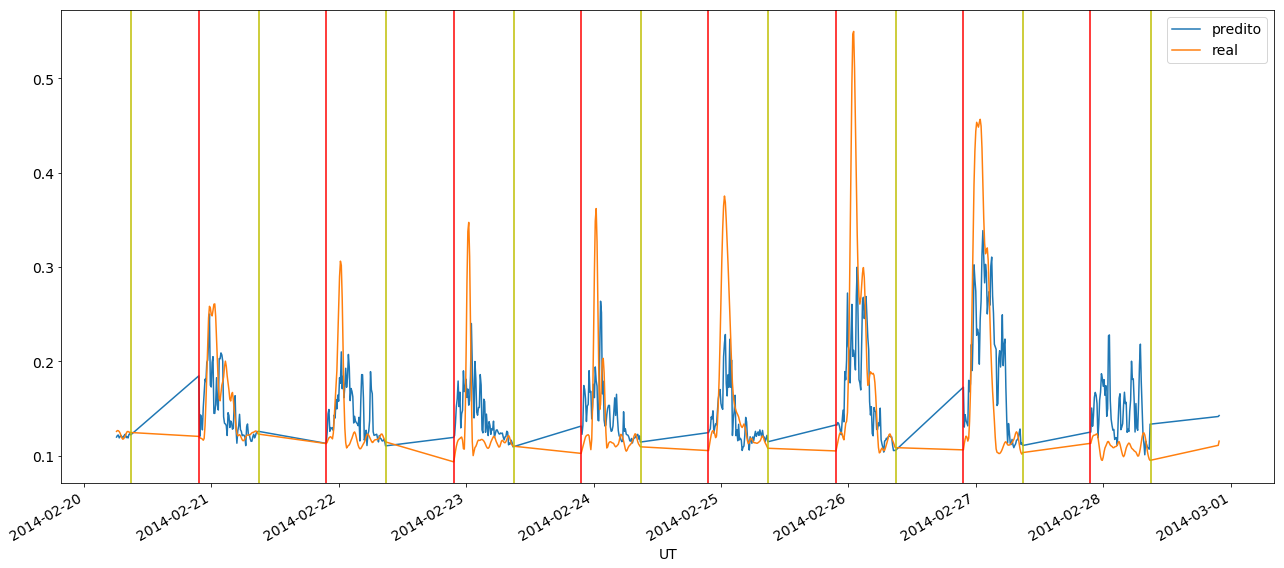


original + lag
Error for the time series sample:
acc             0.864831
f1              0.581550
far             0.428165
fn             36.100000
fp             40.000000
kappa           0.056163
me              0.349773
mse             0.004140
pod             0.594382
precission      0.571835
re             24.475065
recall          0.594382
tn            434.000000
tp             52.900000
tse             1.526389
dtype: float64


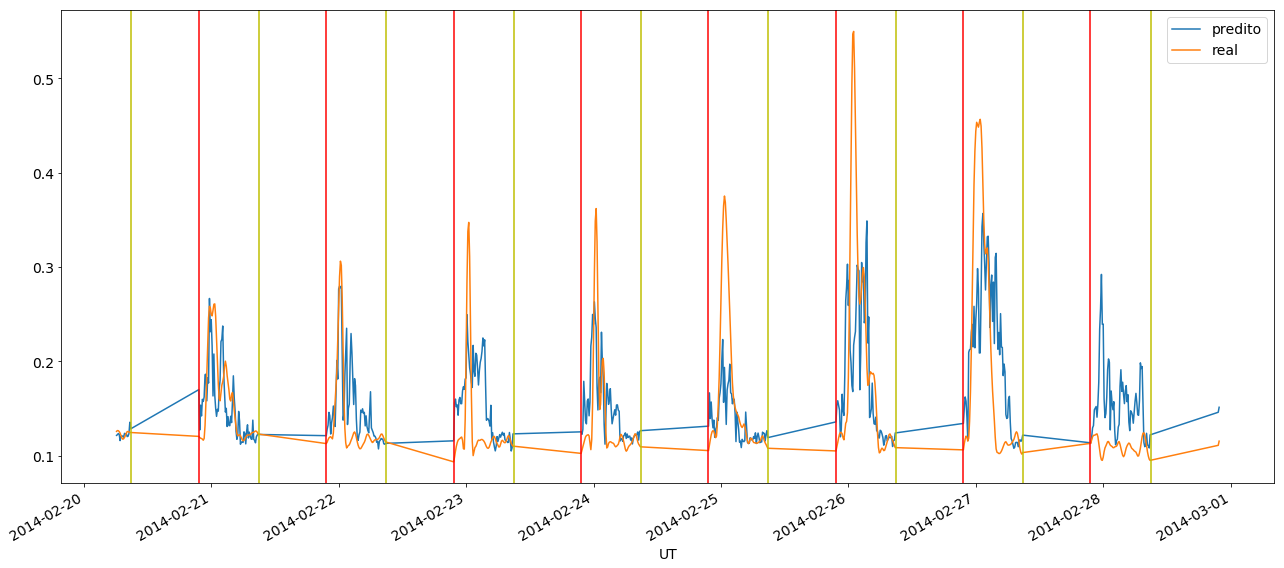


original + mdv1
Error for the time series sample:
acc             0.833215
f1              0.565275
far             0.516827
fn             28.100000
fp             65.800000
kappa           0.048833
me              0.347881
mse             0.004676
pod             0.684270
precission      0.483173
re             29.012913
recall          0.684270
tn            408.200000
tp             60.900000
tse             1.621110
dtype: float64


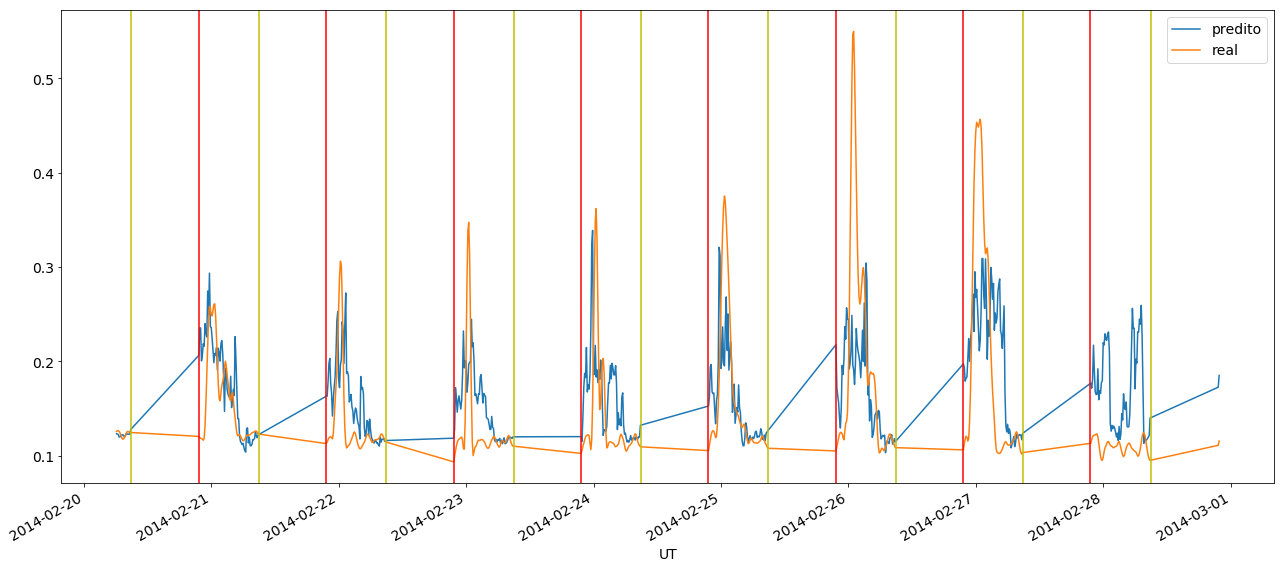


original + mdv2
Error for the time series sample:
acc             0.866075
f1              0.545580
far             0.409472
fn             43.800000
fp             31.600000
kappa           0.065598
me              0.352905
mse             0.004408
pod             0.507865
precission      0.590528
re             26.029197
recall          0.507865
tn            442.400000
tp             45.200000
tse             1.574989
dtype: float64


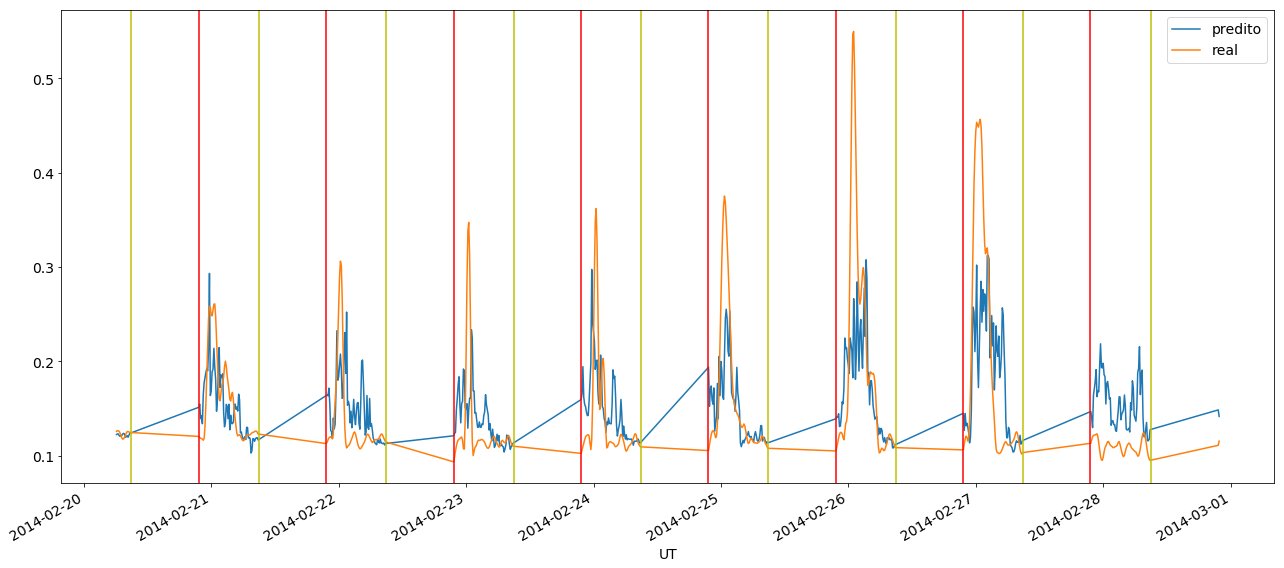


original + tempo + lag
Error for the time series sample:
acc             0.876909
f1              0.615919
far             0.390161
fn             33.300000
fp             36.000000
kappa           0.052403
me              0.346210
mse             0.003850
pod             0.625843
precission      0.609839
re             23.019145
recall          0.625843
tn            438.000000
tp             55.700000
tse             1.471602
dtype: float64


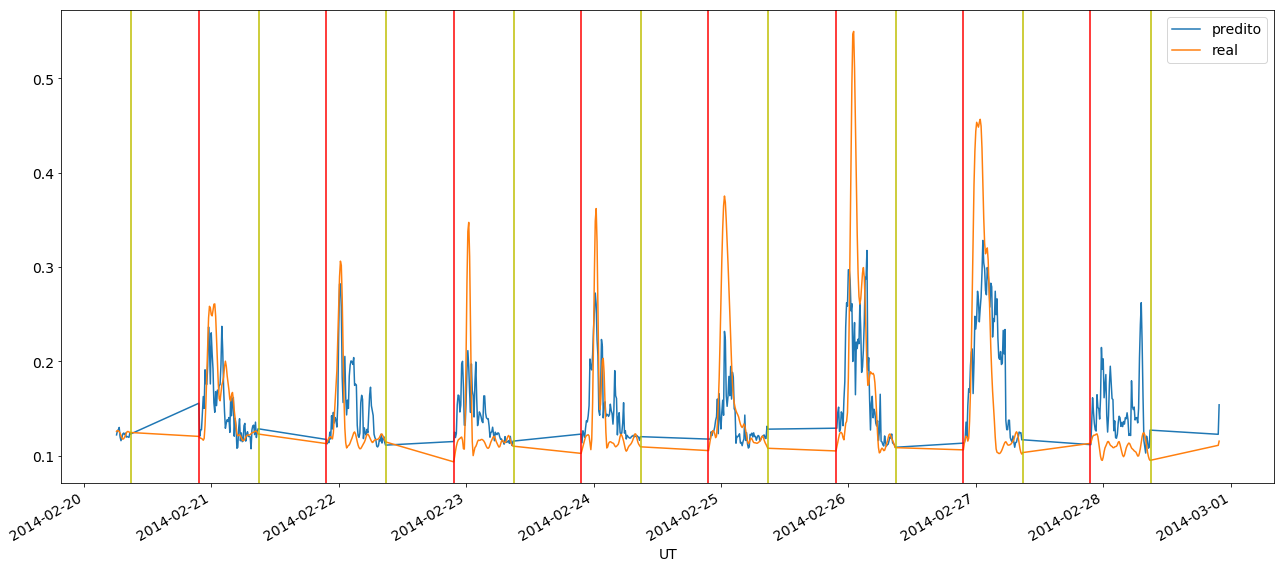


original + tempo + mdv2
Error for the time series sample:
acc             0.876377
f1              0.596940
far             0.382312
fn             37.400000
fp             32.200000
kappa           0.057414
me              0.341560
mse             0.004184
pod             0.579775
precission      0.617688
re             25.121835
recall          0.579775
tn            441.800000
tp             51.600000
tse             1.534399
dtype: float64


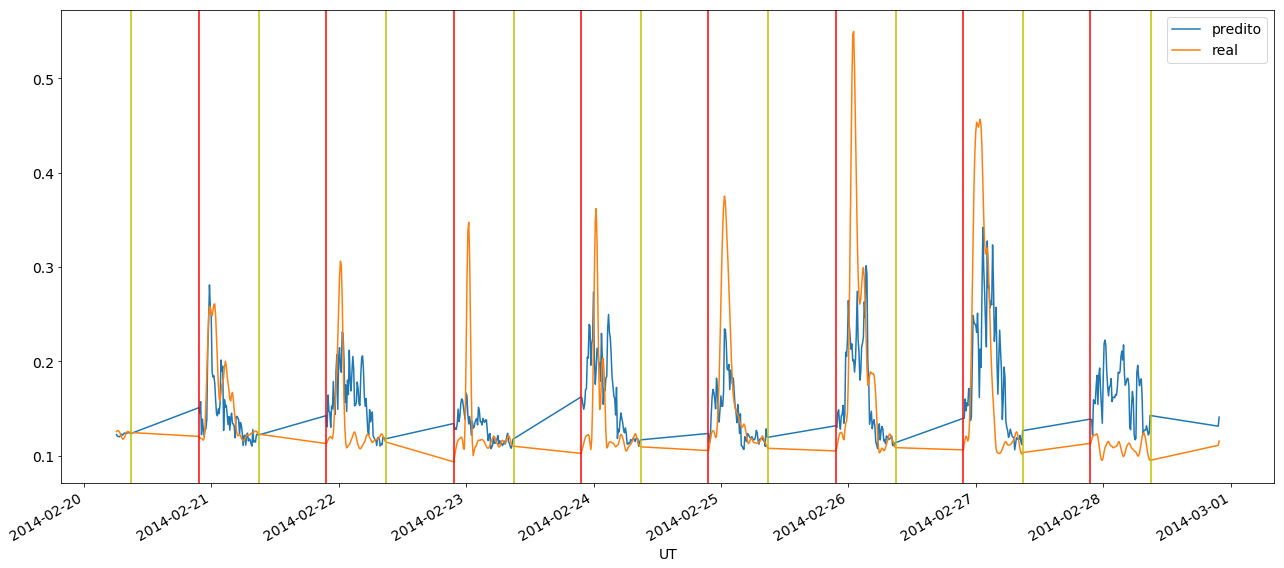


original + tempo + mdv2 + lag
Error for the time series sample:
acc             0.862877
f1              0.597382
far             0.438503
fn             31.500000
fp             45.700000
kappa           0.051122
me              0.338724
mse             0.004090
pod             0.646067
precission      0.561497
re             24.765752
recall          0.646067
tn            428.300000
tp             57.500000
tse             1.515589
dtype: float64


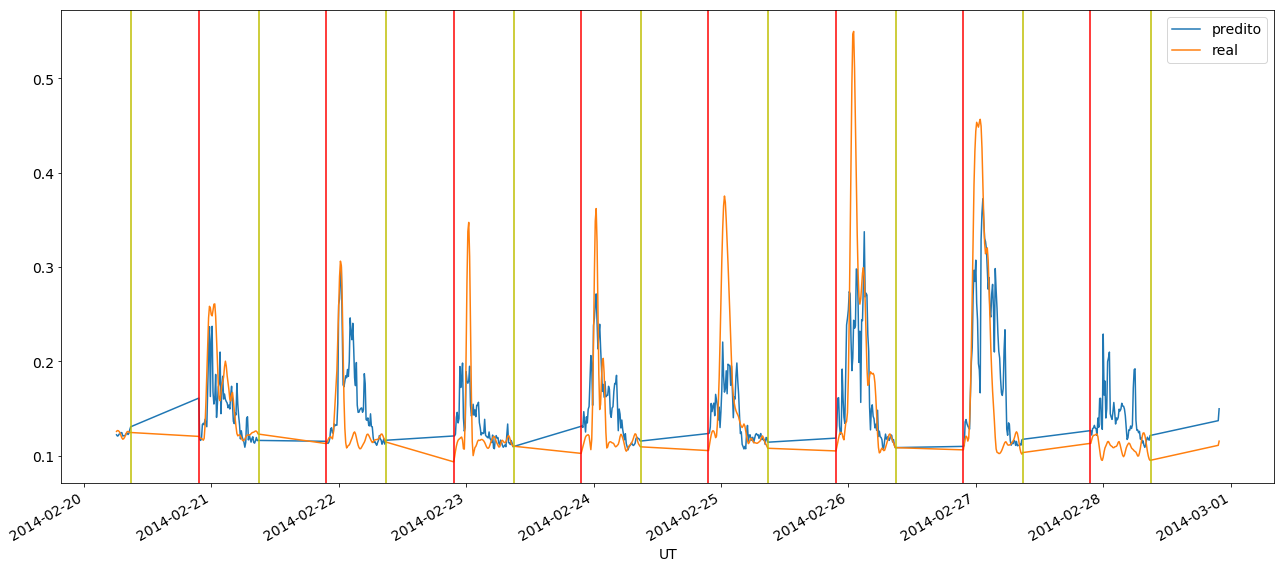


original + tempo + lag + mdv1 + mdv2
Error for the time series sample:
acc             0.844760
f1              0.607185
far             0.491429
fn             21.600000
fp             65.800000
kappa           0.041798
me              0.327470
mse             0.004367
pod             0.757303
precission      0.508571
re             29.039873
recall          0.757303
tn            408.200000
tp             67.400000
tse             1.565902
dtype: float64


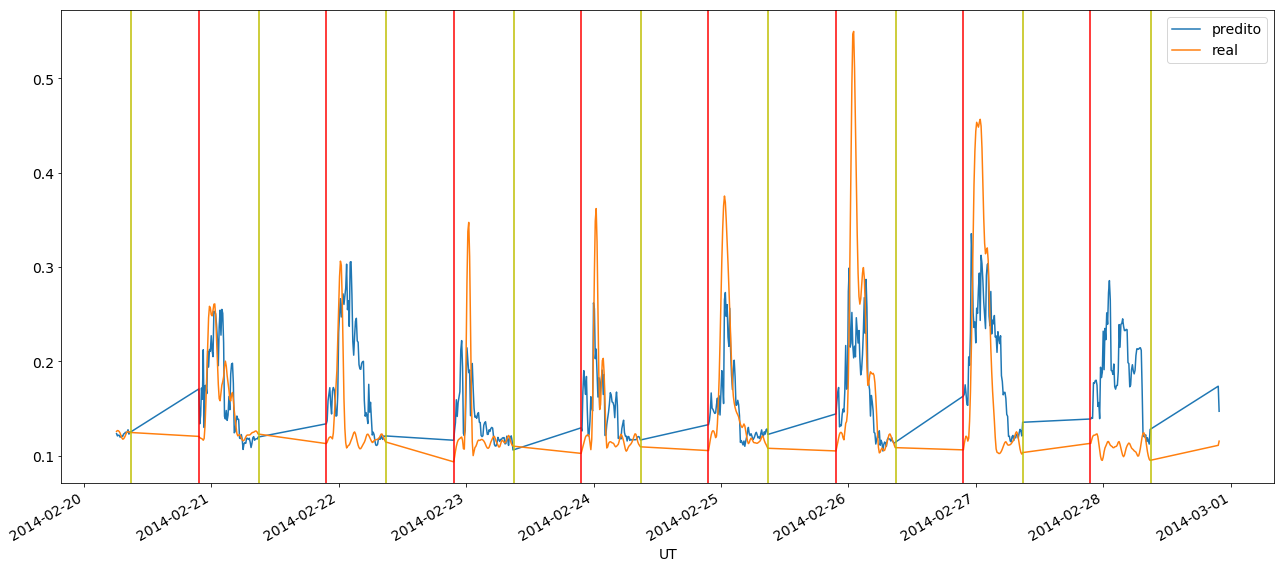


vtec
Error for the time series sample:
acc             0.784192
f1              0.262805
far             0.714493
fn             67.300000
fp             54.200000
kappa           0.092855
me              0.390241
mse             0.007142
pod             0.243820
precission      0.285507
re             30.173871
recall          0.243820
tn            419.800000
tp             21.700000
tse             2.005073
dtype: float64


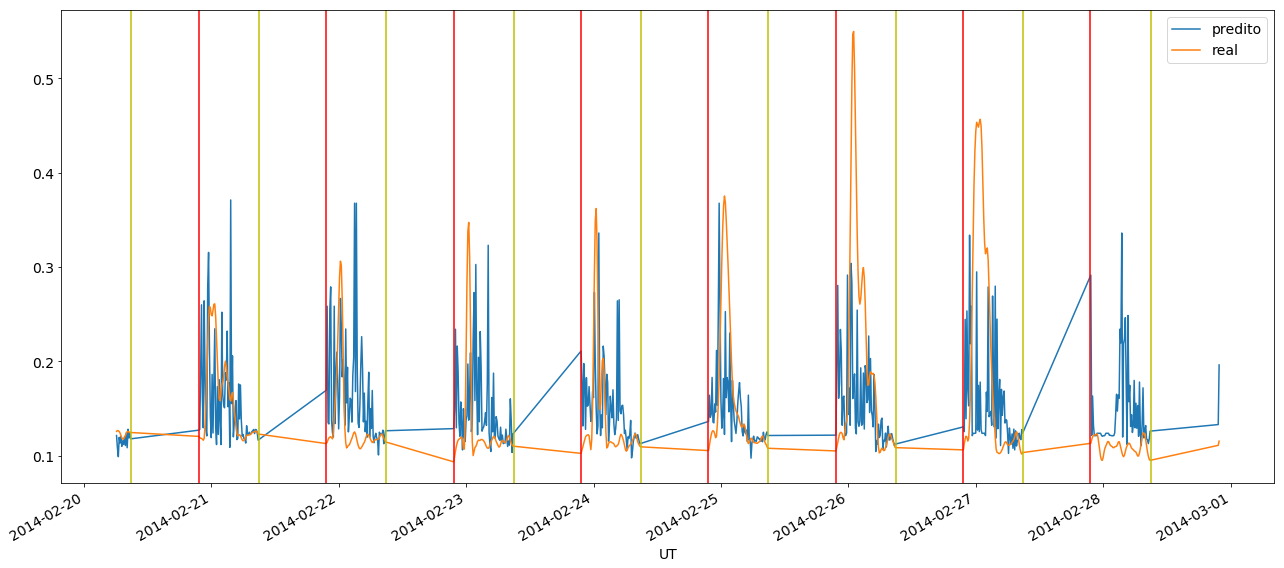


vtec + gvtec1_dt_lag_9
Error for the time series sample:
acc             0.800178
f1              0.492269
far             0.588190
fn             34.500000
fp             78.000000
kappa           0.056483
me              0.344717
mse             0.006009
pod             0.612360
precission      0.411810
re             35.200115
recall          0.612360
tn            396.000000
tp             54.500000
tse             1.839077
dtype: float64


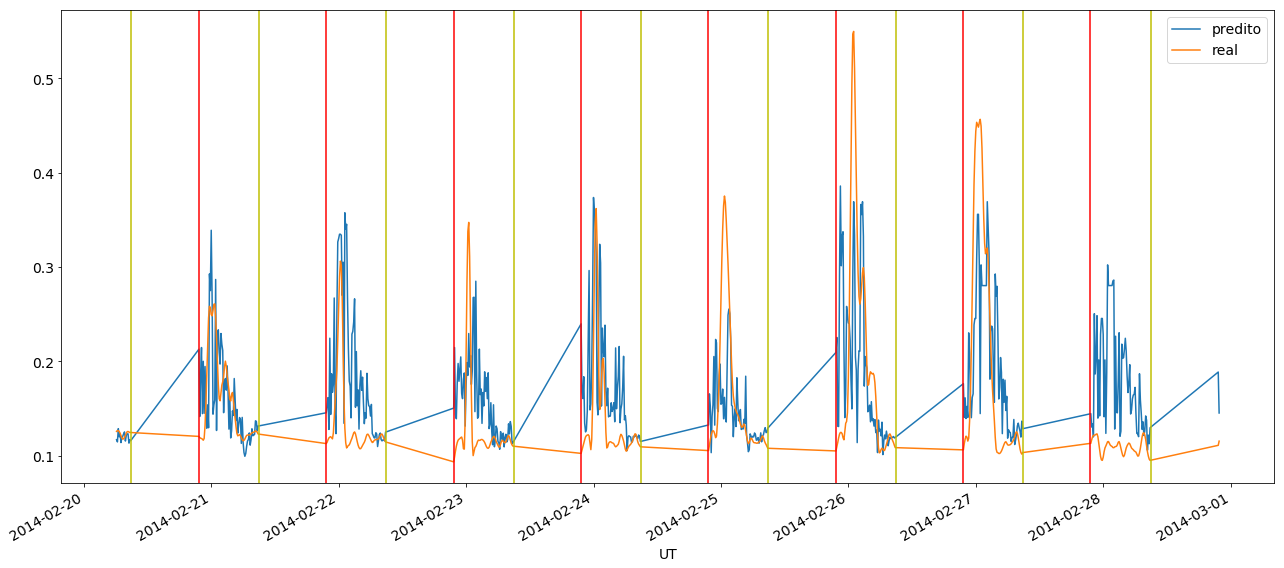


vtec + gvtec2_dt_lag_20
Error for the time series sample:
acc             0.823623
f1              0.458383
far             0.554110
fn             47.000000
fp             52.300000
kappa           0.069445
me              0.322713
mse             0.004496
pod             0.471910
precission      0.445890
re             26.718115
recall          0.471910
tn            421.700000
tp             42.000000
tse             1.590709
dtype: float64


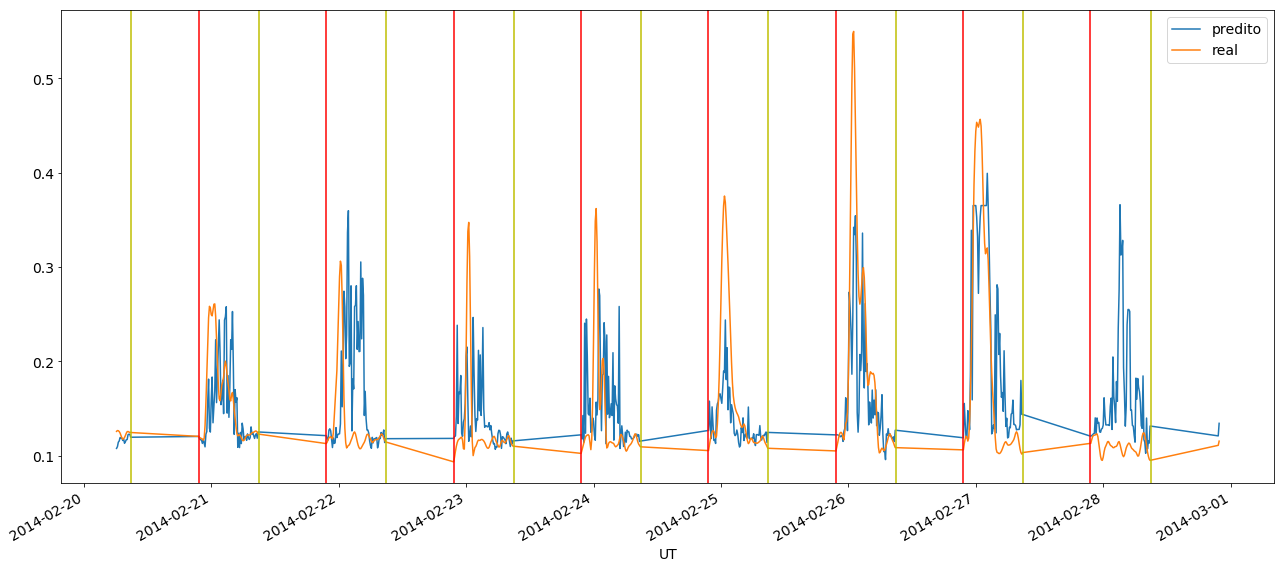


vtec + vtec_dt + vtec_dt2
Error for the time series sample:
acc             0.826643
f1              0.527384
far             0.536394
fn             34.500000
fp             63.100000
kappa           0.055577
me              0.329620
mse             0.005871
pod             0.612360
precission      0.463606
re             32.405233
recall          0.612360
tn            410.900000
tp             54.500000
tse             1.816849
dtype: float64


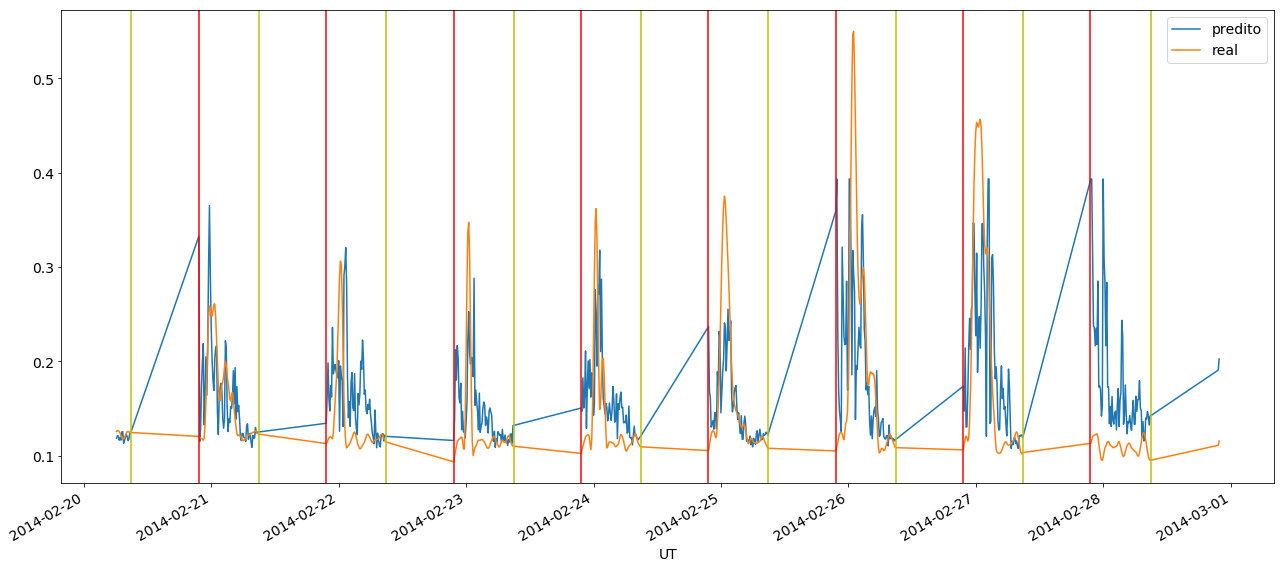


vtec + gvtec1 + gvtec2
Error for the time series sample:
acc             0.841563
f1              0.371744
far             0.501147
fn             62.600000
fp             26.600000
kappa           0.090561
me              0.372781
mse             0.005354
pod             0.296629
precission      0.498853
re             23.216326
recall          0.296629
tn            447.400000
tp             26.400000
tse             1.735777
dtype: float64


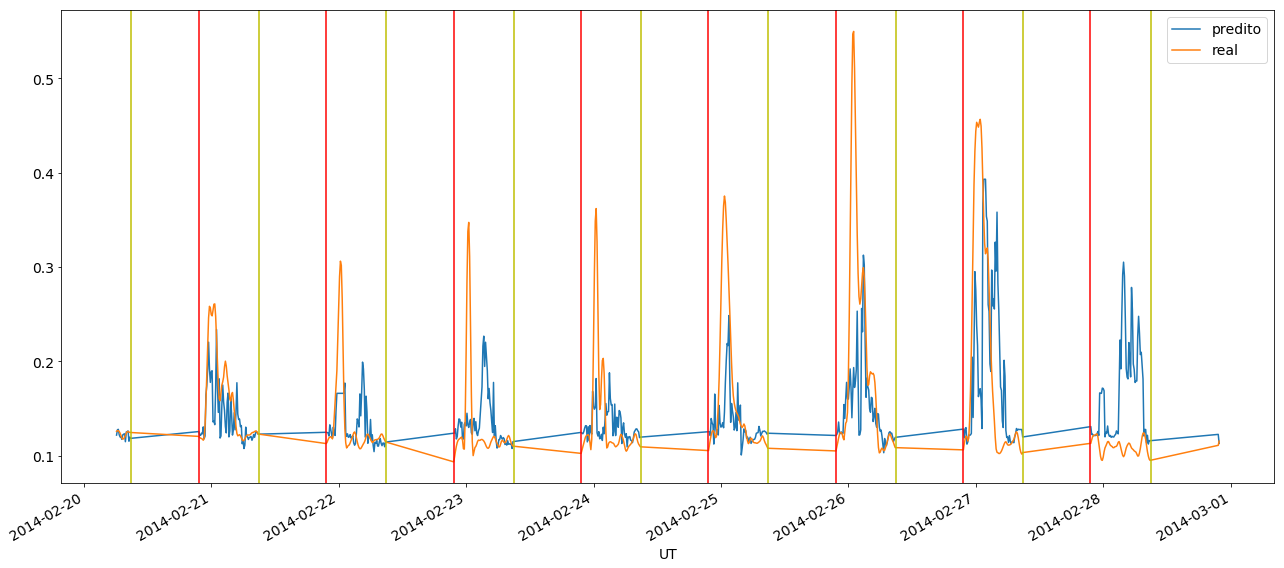


vtec + tempo
Error for the time series sample:
acc             0.781350
f1              0.382303
far             0.654872
fn             50.800000
fp             72.300000
kappa           0.073142
me              0.363251
mse             0.006978
pod             0.429213
precission      0.345128
re             32.586907
recall          0.429213
tn            401.700000
tp             38.200000
tse             1.981776
dtype: float64


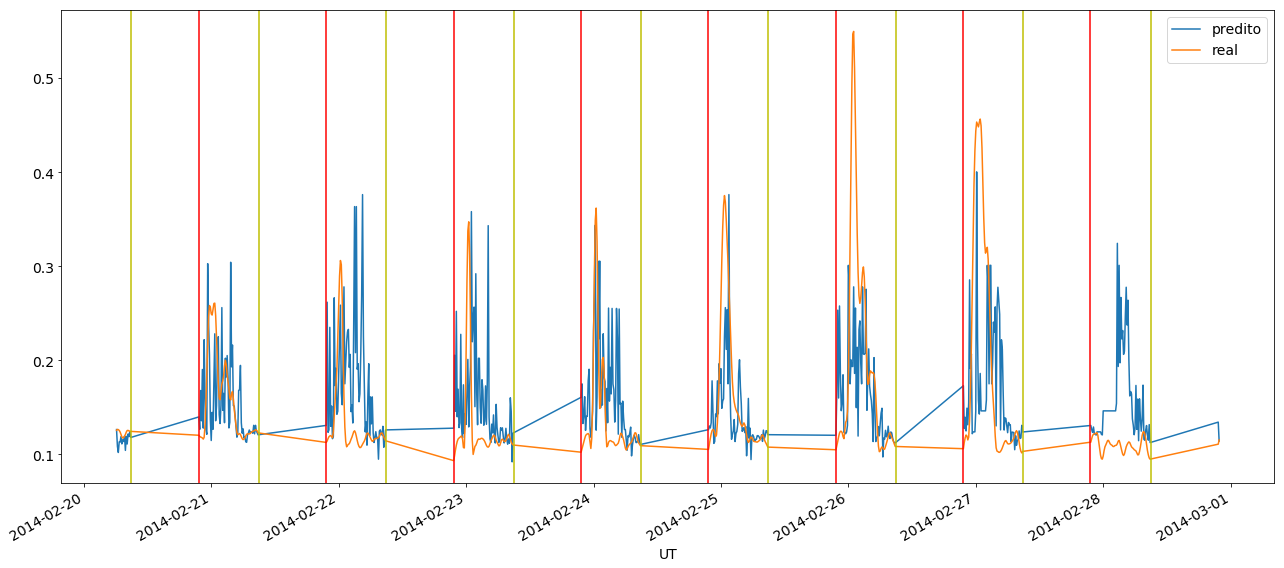


vtec + tempo + mdv1
Error for the time series sample:
acc             0.785968
f1              0.472101
far             0.613977
fn             34.600000
fp             85.900000
kappa           0.057323
me              0.319148
mse             0.009483
pod             0.611236
precission      0.386023
re             40.709348
recall          0.611236
tn            388.100000
tp             54.400000
tse             2.306797
dtype: float64


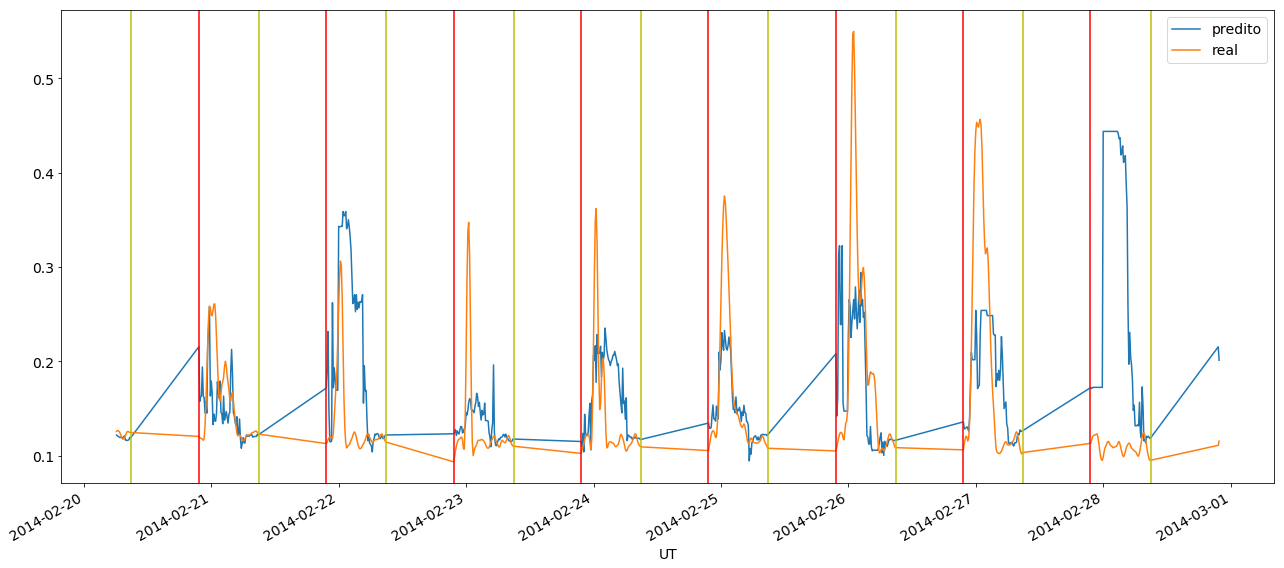


vtec + tempo + lag
Error for the time series sample:
acc             0.822380
f1              0.535146
far             0.542887
fn             31.500000
fp             68.500000
kappa           0.052660
me              0.307584
mse             0.004703
pod             0.646067
precission      0.457113
re             29.050239
recall          0.646067
tn            405.500000
tp             57.500000
tse             1.626567
dtype: float64


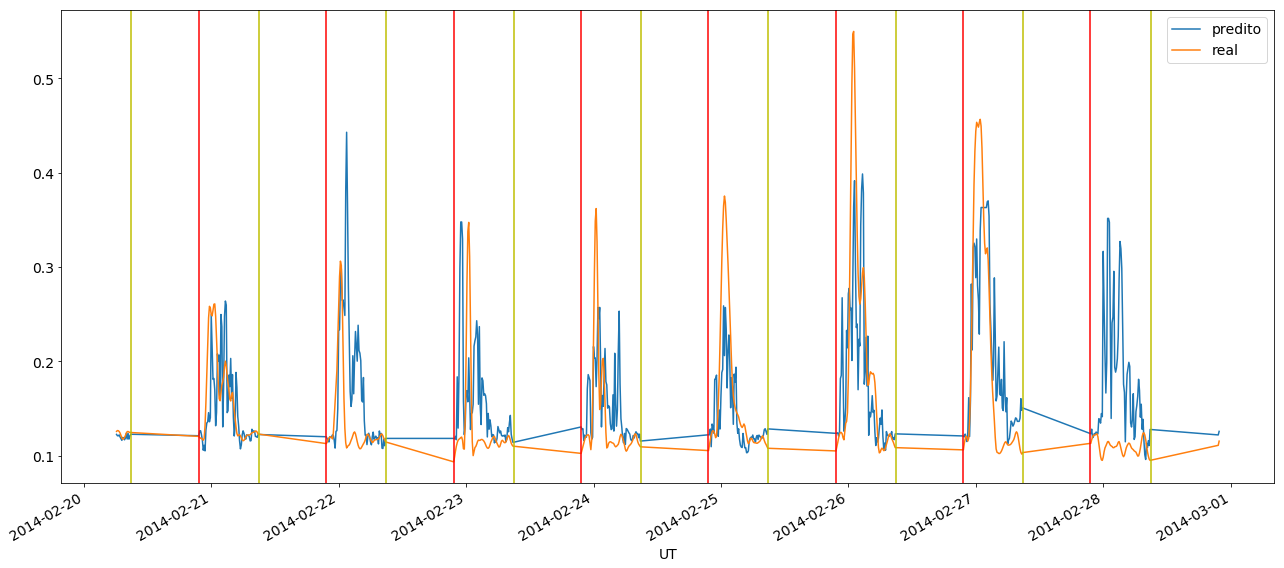


vtec + tempo + lag + mdv1
Error for the time series sample:
acc             0.792362
f1              0.530279
far             0.587074
fn             23.000000
fp             93.900000
kappa           0.047131
me              0.317797
mse             0.007678
pod             0.741573
precission      0.412926
re             36.815468
recall          0.741573
tn            380.100000
tp             66.000000
tse             2.076083
dtype: float64


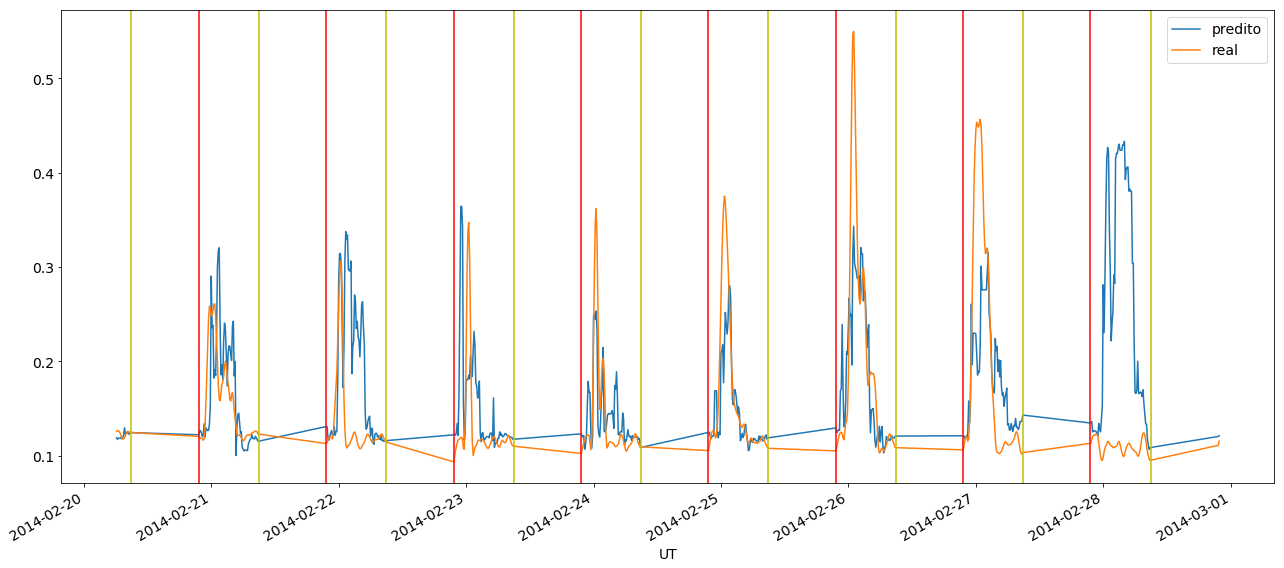


vtec + tempo + lag + mdv2
Error for the time series sample:
acc             0.797158
f1              0.450985
far             0.607200
fn             41.600000
fp             72.600000
kappa           0.063621
me              0.298930
mse             0.005233
pod             0.532584
precission      0.392800
re             30.092789
recall          0.532584
tn            401.400000
tp             47.400000
tse             1.714755
dtype: float64


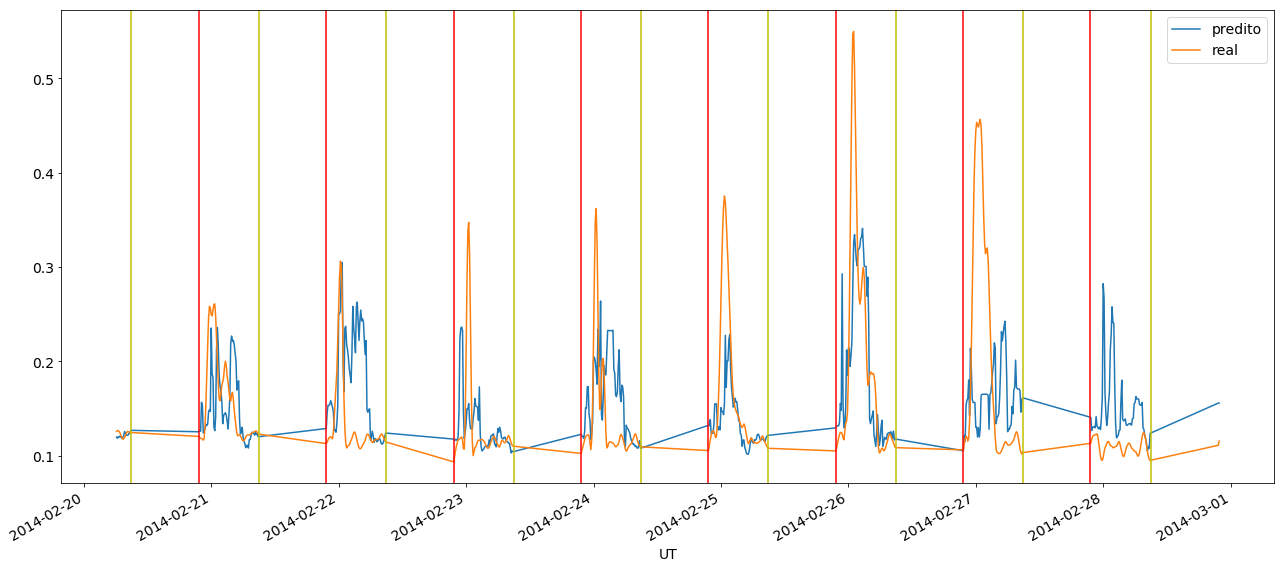


vtec + tempo + lag + mdv1 + mdv2
Error for the time series sample:
acc             0.783126
f1              0.514335
far             0.601501
fn             24.400000
fp             97.700000
kappa           0.048885
me              0.298085
mse             0.006759
pod             0.725843
precission      0.398499
re             37.059936
recall          0.725843
tn            376.300000
tp             64.600000
tse             1.948809
dtype: float64


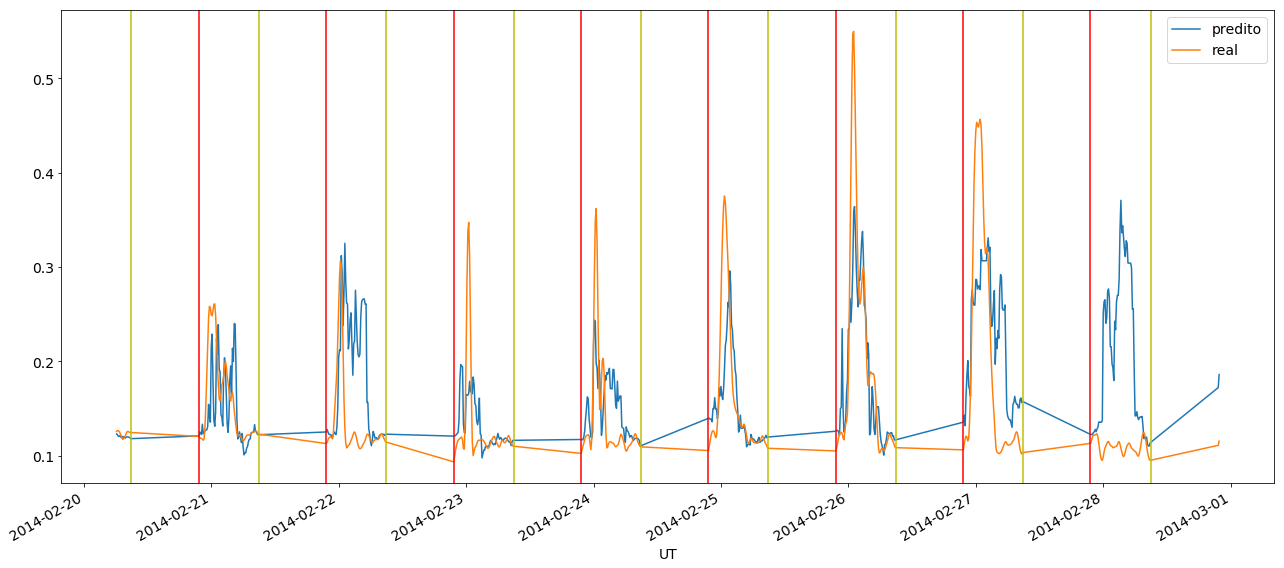

In [6]:
errors = []
for i in set_tests:
    print(i.name)
    dict_error = generate_and_avaliate_model(df=df,
                                            instances_set=list(i.set),
                                            target='s4',
                                            save=True,
                                            file_to_save_model='./images/09_analise_all/' + i.name + '.eps ')
    dict_error['name'] = i.name
    errors.append(dict_error)
    print()
    
#errors = []
#for i in set_tests:
#    print(i.name)
#    dict_error = generate_and_avaliate_model(df=df,
#                                            instances_set=list(i.set),
#                                            target='s4',
#                                            save=True,
#                                            grid_search=True,
#                                            file_to_save_model='./images/09_analise_all/' + i.name + '.eps ')
#    dict_error['name'] = i.name
#    errors.append(dict_error)
#    print()

In [7]:
df = pd.DataFrame(errors) 
df.index = df['name']
del df['name']
df = df[['tp', 'tn', 'fp', 'fn', 're', 'pod', 'far', 'acc', 'precission', 'recall', 'f1', 'kappa', 'me', 'tse', 'mse']]
pd.set_option('precision', 4)

In [8]:
df

,tp,tn,fp,fn,re,pod,far,acc,precission,recall,f1,kappa,me,tse,mse
name,,,,,,,,,,,,,,,
original,45.4,439.6,34.4,43.6,24.1526,0.5101,0.4272,0.8615,0.5728,0.5101,0.5362,0.0654,0.3381,1.5435,0.0042
original - vtec,52.6,416.3,57.7,36.4,30.8478,0.5910,0.5216,0.8329,0.4784,0.5910,0.5282,0.0572,0.3521,1.6777,0.0050
original - vtec_dt,38.4,445.4,28.6,50.6,23.5493,0.4315,0.4269,0.8593,0.5731,0.4315,0.4912,0.0746,0.3458,1.5762,0.0044
original - gvtec1,43.4,444.2,29.8,45.6,24.9816,0.4876,0.4043,0.8661,0.5957,0.4876,0.5350,0.0680,0.3526,1.5767,0.0044
original - gvtec1_dt,37.5,444.3,29.7,51.5,23.0573,0.4213,0.4393,0.8558,0.5607,0.4213,0.4798,0.0757,0.3672,1.5828,0.0045
original - gvtec2,50.5,409.6,64.4,38.5,31.1063,0.5674,0.5608,0.8172,0.4392,0.5674,0.4945,0.0601,0.3459,1.7200,0.0053
original - gvtec2_dt,42.2,443.7,30.3,46.8,23.6487,0.4742,0.4138,0.8631,0.5862,0.4742,0.5232,0.0695,0.3713,1.5750,0.0044
original + tempo,48.6,441.8,32.2,40.4,23.9572,0.5461,0.3988,0.8710,0.6012,0.5461,0.5709,0.0612,0.3595,1.5383,0.0042
original + gvtec1_dt_lag_9,52.7,439.8,34.2,36.3,24.1286,0.5921,0.3912,0.8748,0.6088,0.5921,0.5992,0.0561,0.3441,1.5219,0.0041
